# Is Palmer Penguins Okay?

I wasn't sure if I was allowed to implement the Perceptron algorithm on Palmer Penguins, because that was technically a dataset that was mentioned in class. As such, I've made this second notebook just in case that's an invalid dataset to use. I may just be overthinking it (but I will not be risking my GPA :')), so in the meantime, enjoy this implementation of the Perceptron on the mushrooms dataset using sci-kit learn modules. It's a lot briefer, but I hope you understand that I definitely understand this Perceptron model (please trust me).

[The Mushrooms Dataset](https://archive.ics.uci.edu/dataset/73/mushroom) contains samples from 23 species of gilled mushrooms, in which mushrooms are classified to be edible or poisonous. The other key features are defined here:

1) cap_diameter
2) cap-shape
3) gill-attachment 
4) gill_color
5) stem_height
6) stem_width
7) stem-color
8) season
9) class

(I am using a cleaned version of the mushroom dataset)

We will be trying to predict whether or not a mushroom is poisonous based on two features.

       cap_diameter     cap-shape  gill-attachment    gill_color  \
count  54035.000000  54035.000000     54035.000000  54035.000000   
mean     567.257204      4.000315         2.142056      7.329509   
std      359.883763      2.160505         2.228821      3.200266   
min        0.000000      0.000000         0.000000      0.000000   
25%      289.000000      2.000000         0.000000      5.000000   
50%      525.000000      5.000000         1.000000      8.000000   
75%      781.000000      6.000000         4.000000     10.000000   
max     1891.000000      6.000000         6.000000     11.000000   

        stem_height    stem_width    stem-color        season         class  
count  54035.000000  54035.000000  54035.000000  54035.000000  54035.000000  
mean       0.759110   1051.081299      8.418062      0.952163      0.549181  
std        0.650969    782.056076      3.262078      0.305594      0.497580  
min        0.000426      0.000000      0.000000      0.027372      0.000000

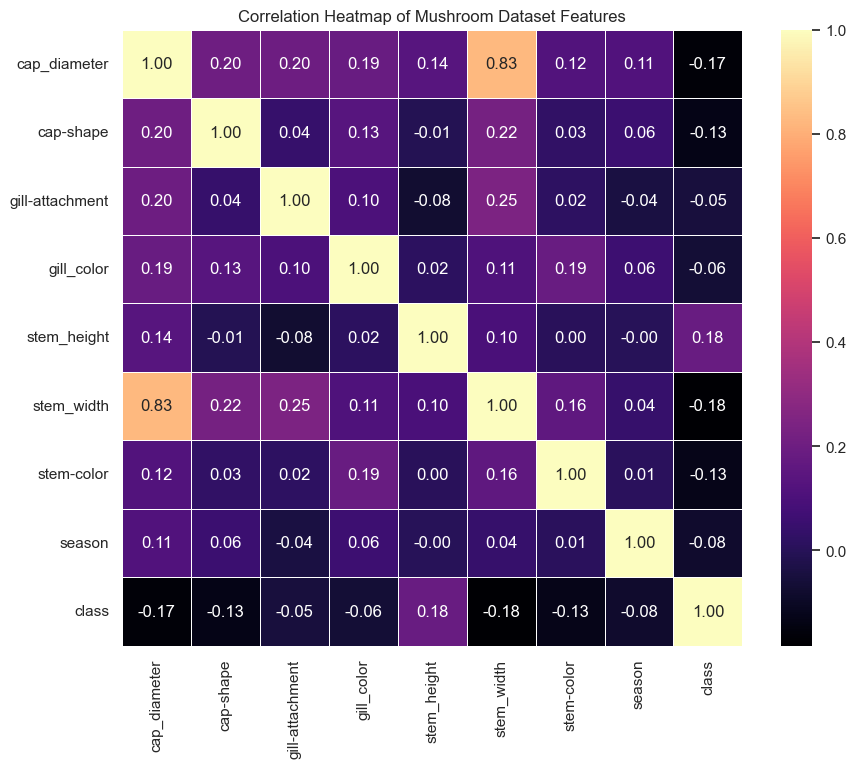

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

url = r"C:\Users\faith\new577\INDE577\577repo\Supervised Learning\Datasets\mushroom_cleaned.csv"
df = pd.read_csv(url)
df= df.dropna()

#see information: 
print(df.describe()) 

#plotting a heatmap to see correlation
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Mushroom Dataset Features')
plt.show()

Since it seems like stem width and cap diameter are pretty highly correlated, so let's try to classify this dataset based on those features.

In [22]:
X = df.iloc[:, [0,5]]
y = df.iloc[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)

y_pred_train = perceptron.predict(X_train)
y_pred_test = perceptron.predict(X_test)

In [23]:

train_accuracy = accuracy_score(y_train, y_pred_train) 
test_accuracy = accuracy_score(y_test, y_pred_test) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

print(f"Training accuracy: {train_accuracy}")
print(f"Testing accuracy: {test_accuracy}")
print(f"Confusion matrix on test data: \n{cm}", "\n")

print("collection of true/false: \n", y_test == y_pred_test)




Training accuracy: 0.5502590947546532
Testing accuracy: 0.5466658441798778
Confusion matrix on test data: 
[[   0 7349]
 [   0 8862]] 

collection of true/false: 
 14085    False
19006     True
50623    False
41819    False
8085      True
         ...  
33486     True
22637     True
25133    False
2858      True
36447     True
Name: class, Length: 16211, dtype: bool


Not the best accuracy, but note that the data might not be so easily separable! We can visualize that through this plot here:

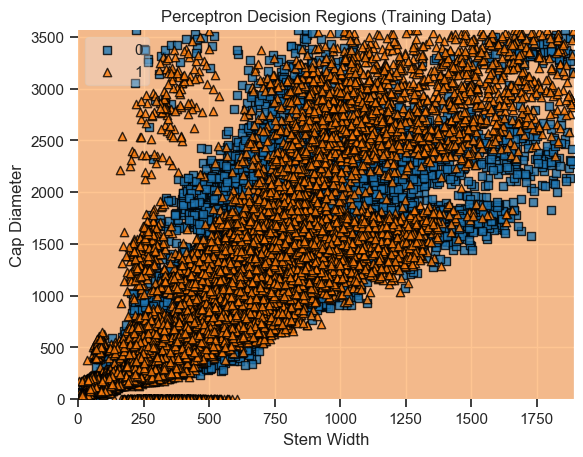

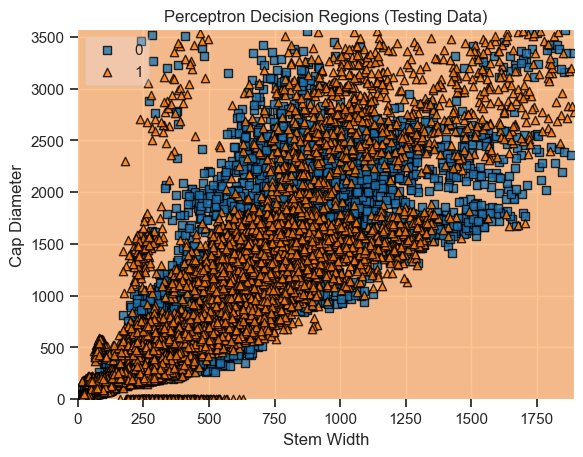

In [24]:
from mlxtend.plotting import plot_decision_regions
import warnings

warnings.filterwarnings("ignore", message="X does not have valid feature names, but Perceptron was fitted with feature names", category=UserWarning)

# plot decision regions for training data
plot_decision_regions(X_train.values, y_train.values, clf=perceptron, legend=2)
plt.title('Perceptron Decision Regions (Training Data)')
plt.xlabel('Stem Width')
plt.ylabel('Cap Diameter')
plt.show()

# plot decision regions for testing data
plot_decision_regions(X_test.values, y_test.values, clf=perceptron, legend=2)
plt.title('Perceptron Decision Regions (Testing Data)')
plt.xlabel('Stem Width')
plt.ylabel('Cap Diameter')
plt.show()




So yes, definitely really crazy with basically 50% accuracy, and  every poisonous mushroom being basically a false positive as seen by the confusion matrix (lol). This is not linearly separable at all- in fact it feels like the data is literally just on top of each other! That is one of the big limitations of the Perceptron, and we'll learn more about stronger algorithms throughout this repository.